![](http://www.kiplinger.com/kipimages/pages/14024.jpg)

# An Extensive Medicare Data Exploration - Healthcare Analysis

## About Medicare 

In the United States, Medicare is a single-payer, national social insurance program administered by the U.S. federal government since 1966. United States Medicare is funded by a payroll tax, premiums and surtaxes from beneficiaries, and general revenue. It provides health insurance for Americans aged 65 and older who have worked and paid into the system through the payroll tax. It also provides health insurance to younger people with some disability status as determined by the Social Security Administration, as well as people with end stage renal disease and amyotrophic lateral sclerosis.

In 2015, Medicare provided health insurance for over **55 million** (46 million people age 65 and older and 9 million younger people). On average, Medicare covers about half of the health care charges for those enrolled. The enrollees must then cover their remaining costs either with supplemental insurance, separate insurance, or out-of-pocket. Out-of-pocket costs can vary depending on the amount of health care a Medicare enrollee needs. 

## About CMS

The Centers for Medicare & Medicaid Services (CMS), previously known as the Health Care Financing Administration (HCFA), is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. In addition to these programs, CMS has other responsibilities, including the administrative simplification standards from the Health Insurance Portability and Accountability Act of 1996 (HIPAA), quality standards in long-term care facilities (more commonly referred to as nursing homes) through its survey and certification process, clinical laboratory quality standards under the Clinical Laboratory Improvement Amendments, and oversight of HealthCare.gov.

## About the Data-Set

This [public dataset](https://www.kaggle.com/cms/cms-medicare) was created by the Centers for Medicare & Medicaid Services. The data summarizes the utilization and payments for procedures, services, and prescription drugs provided to Medicare beneficiaries by specific inpatient and outpatient hospitals, physicians, and other suppliers. The dataset includes the following data: Common inpatient and outpatient services, All physician and other supplier procedures and services, All Part D prescriptions. Providers determine what they will charge for items, services, and procedures provided to patients and these charges are the amount that providers bill for an item, service, or procedure.



## Objectives of the Lab

### 1. Run our very first multiple regression analysis
### 2. Interpret the results


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go

import statsmodels.formula.api as smf

## 1. Let's load the empirical dataset we want to derive insights from
![](http://www.arh.org/Uploads/Images/Page/services-skillednursing%5B1%5D.jpg)

In [ ]:
nursingFacilities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/nursing_facilities_2014.csv')

In [ ]:
nursingFacilities.head()

,Unnamed: 0,provider_id,facility_name,street_address,city,state,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,0,235618,HEARTLAND HEALTH CARE CENTER-CANTON,7025 LILLEY ROAD,CANTON,MI,48187,1104,829,25.1,...,40.0,51.0,47.0,70.0,NaN,68.0,20.0,69.0,10.0,17
1,1,495217,MANORCARE HEALTH SERVICES-FAIR OAKS,12475 LEE JACKSON MEMORIAL HIGHWAY,FAIRFAX,VA,22033,436,350,26.3,...,29.0,43.0,46.0,72.0,NaN,54.0,17.0,53.0,11.0,19
2,2,495121,CHERRYDALE HEALTH AND REHABILITATION CENTER,3710 LEE HIGHWAY,ARLINGTON,VA,22207,353,289,23.1,...,34.0,49.0,49.0,67.0,NaN,50.0,14.0,47.0,24.0,19
3,3,225554,COOLIDGE HOUSE,30 WEBSTER STREET,BROOKLINE,MA,2446,368,297,19.5,...,16.0,55.0,46.0,68.0,NaN,45.0,25.0,65.0,15.0,12
4,4,235663,NOTTING HILL OF WEST BLOOMFIELD,6535 DRAKE ROAD,W BLOOMFIELD,MI,48322,871,697,27.2,...,29.0,50.0,49.0,74.0,NaN,67.0,23.0,70.0,10.0,17


In [ ]:
nursingFacilities.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
nursingFacilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15026 entries, 0 to 15025
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   provider_id                                           15026 non-null  int64  
 1   facility_name                                         15026 non-null  object 
 2   street_address                                        15026 non-null  object 
 3   city                                                  15026 non-null  object 
 4   state                                                 15026 non-null  object 
 5   zip_code                                              15026 non-null  int64  
 6   total_stays                                           15026 non-null  int64  
 7   distinct_beneficiaries_per_provider                   15026 non-null  int64  
 8   average_length_of_stays_days                          15

In [ ]:
nursingFacilities.describe()

,provider_id,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,total_snf_charge_amount,total_snf_medicare_allowed_amount,total_snf_medicare_payment_amount,total_snf_medicare_standard_payment_amount,average_age,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
count,15026.00000,15026.000000,15026.000000,15026.000000,15026.000000,1.502600e+04,1.502600e+04,1.502600e+04,1.502600e+04,15026.000000,...,14991.000000,14619.000000,14872.000000,13629.000000,231.000000,13917.000000,15024.000000,14318.000000,14885.000000,15026.000000
mean,295268.93438,49548.870957,166.301544,132.337149,28.130075,2.979363e+06,2.186786e+06,1.804748e+06,1.856649e+06,78.644150,...,37.509572,49.233805,46.587614,61.395407,69.891775,57.198031,18.347378,54.852284,20.156869,18.018967
std,172245.62168,26818.941024,151.793460,123.906842,7.383997,3.274693e+06,2.123067e+06,1.811159e+06,1.734586e+06,4.686173,...,10.540757,10.952155,10.988216,9.270699,6.134115,10.022661,7.990701,10.606628,12.137511,6.689469
min,10007.00000,660.000000,11.000000,11.000000,2.000000,2.197800e+04,7.064000e+03,7.064000e+03,8.150000e+03,45.000000,...,0.000000,6.000000,0.000000,10.000000,38.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,155325.50000,29349.000000,64.000000,50.000000,23.700000,1.015431e+06,8.021298e+05,6.372892e+05,6.925308e+05,76.000000,...,30.000000,42.000000,39.000000,56.000000,68.000000,51.000000,13.000000,48.000000,12.000000,14.000000
50%,265779.50000,48185.000000,123.000000,95.000000,27.800000,2.033186e+06,1.579600e+06,1.273338e+06,1.377898e+06,79.000000,...,37.000000,49.000000,47.000000,63.000000,72.000000,58.000000,18.000000,56.000000,17.000000,18.000000
75%,395718.75000,72014.250000,216.000000,172.000000,32.400000,3.764452e+06,2.856638e+06,2.337140e+06,2.435829e+06,82.000000,...,44.000000,57.000000,54.000000,68.000000,74.000000,65.000000,23.000000,63.000000,26.000000,22.000000
max,676372.00000,99901.000000,2026.000000,1772.000000,68.600000,1.017705e+08,2.720066e+07,2.415078e+07,2.041167e+07,92.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,70.000000,75.000000,75.000000,59.000000


# Multiple Regression
### Let's assume that we are interested in exploring the impact of several factors on the outcome `total_snf_medicare_payment_amount`

## Step 1. We start with a simple regression model 


#### In previous labs we found that the factor `total_stays` was statistically significant, let's start with this factor

<Axes: xlabel='total_stays', ylabel='total_snf_medicare_payment_amount'>

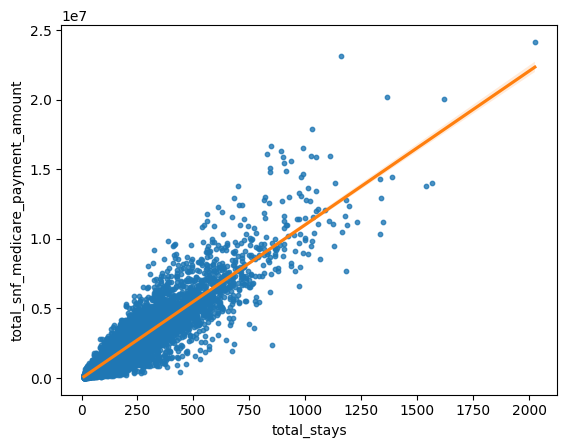

In [ ]:
sns.regplot(data=nursingFacilities,y='total_snf_medicare_payment_amount',x='total_stays',order=1,scatter_kws={"s": 10},line_kws={"color": "C1"})

In [ ]:
reg = smf.ols(formula='total_snf_medicare_payment_amount ~ total_stays', data=nursingFacilities)

In [ ]:
results=reg.fit()

In [ ]:
# Inspect the results
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     total_snf_medicare_payment_amount   R-squared:                       0.856
Model:                                           OLS   Adj. R-squared:                  0.856
Method:                                Least Squares   F-statistic:                 8.907e+04
Date:                               Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                                       08:58:55   Log-Likelihood:            -2.2329e+05
No. Observations:                              15026   AIC:                         4.466e+05
Df Residuals:                                  15024   BIC:                         4.466e+05
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                  coef    std err          t      P>|t|     

## Based on the previous we have fitted the following model:

 total_snf_medicare_payment_amount=-30750+11040*total_stays+u 



## How do we interpret the equation?

#### We can write the predicted change in total medicare payment amount as a function of the change of total stays:

 $\Delta$total_snf_medicare_payment_amount=11040$\Delta$total_stays

#### This means that if the total stays increases by one unit , $\Delta$total_stays=1, then total medicare payment is predicted to change by about 11040 dollars.

In [ ]:
results.rsquared

0.8556710585880206

### This is not a bad model, it is able to  explain 85%% of the total variation in medicare payments
### Conversely, the current model leaves 15%% of the variation unexplained.

### We can try to add additional factors to increase its explainability

## Step 2. We incorporate an additional factor to the simple regression model 



In [ ]:
reg2 = smf.ols(formula='total_snf_medicare_payment_amount ~ total_stays+average_length_of_stays_days', data=nursingFacilities)

In [ ]:
results2=reg2.fit()

In [ ]:
print(results2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     total_snf_medicare_payment_amount   R-squared:                       0.893
Model:                                           OLS   Adj. R-squared:                  0.893
Method:                                Least Squares   F-statistic:                 6.255e+04
Date:                               Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                                       09:21:51   Log-Likelihood:            -2.2106e+05
No. Observations:                              15026   AIC:                         4.421e+05
Df Residuals:                                  15023   BIC:                         4.422e+05
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                                   coef    std err          

## Based on the previous we have fitted the following model:
$$ total\_snf\_medicare\_payment\_amount=-1465000+11510*total\_stays+48230*average\_lenght\_of\_stays\_days+u $$

#### Both factors are statistically significant (p-values close to zero)



## How do we interpret the equation?

#### We can write the predicted change in total medicare payment amount as a function of the change of total stays AND average lengh of stays days

#### Each factor is considered to contribute independently to the change in the outcome:

#### A one unit increase in total stays increases total medicare payment amount by 11510 dollars.

#### A one unit increase in the average lenght of stays days increases total medicare payment amount by 48230 dollars

In [ ]:
results2.rsquared

0.8927914757514595

### This two factor model explains 89% of the total variance in medicare payments. This is really good
#### We can keep adding other factors


## Step 3. We incorporate an additional factor to the simple regression model 

In [ ]:
reg3 = smf.ols(formula='total_snf_medicare_payment_amount ~ total_stays+average_length_of_stays_days+average_hcc_score+percent_of_beneficiaries_with_stroke', data=nursingFacilities)

In [ ]:
results3=reg3.fit()

In [ ]:
print(results3.summary())

                                    OLS Regression Results                                   
Dep. Variable:     total_snf_medicare_payment_amount   R-squared:                       0.894
Model:                                           OLS   Adj. R-squared:                  0.894
Method:                                Least Squares   F-statistic:                 3.177e+04
Date:                               Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                                       10:04:48   Log-Likelihood:            -2.2095e+05
No. Observations:                              15026   AIC:                         4.419e+05
Df Residuals:                                  15021   BIC:                         4.420e+05
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                                           coef    std err  

## Based on the previous we have fitted the following model:
$$ total\_snf\_medicare\_payment\_amount=-1689000+11490*total\_stays+45670*average\_lenght\_of\_stays\_days+119500*average\_hcc\_score+1069.23*percent\_of\_beneficiaries\_with\_stroke+u $$

#### All factors are statistically significant (p-values close to zero) except for the factor `percent of beneficiaries with stroke` which is not statistically significant (p-value not close to zero).

#### Therefore we don't add this factor to our model.